# Comarket Movement Sector Analysis

In [1]:
import pandas as pd
import pickle
from fbprophet import Prophet
from fbprophet.plot import plot_yearly

In [2]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

/Users/brandonfan/opt/anaconda3/envs/stocks/lib/python3.8/site-packages/tslearn/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
/Users/brandonfan/opt/anaconda3/envs/stocks/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


## Get Price Data

In [3]:
bull_market_prices = pd.read_csv('./data/bull-market.csv')
prices_2008 = pd.read_csv('./data/2008-market.csv')
prices_2018 = pd.read_csv('./data/2018-market.csv')

/Users/brandonfan/opt/anaconda3/envs/stocks/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
def get_prices(ticker, year='2010'):
    if year == '2008':
        return prices_2008[prices_2008['tic'] == ticker]
    elif year == '2018':
        return prices_2018[prices_2018['tic'] == ticker]
    else:
        return bull_market_prices[bull_market_prices['tic'] == ticker]

## Analyze Sector 20.0 in 2008 Bear Market

In [5]:
with open('./scripts/results/20.0/20.0-2008-seasonalities.p', 'rb') as f:
    seasonalities = pickle.load(f)

In [6]:
clf = TimeSeriesKMeans(n_clusters=4, metric='dtw', max_iter=10, n_jobs=3)

In [7]:
clf = clf.from_pickle('./scripts/results/20.0/20.0-2008-model.p')

In [8]:
tickers = list(seasonalities.keys())

In [9]:
industries = []
for ticker in tickers: 
    industries.append(get_prices(ticker, year='2008').iloc[0]['gind'])

In [10]:
dataset = []
for value in seasonalities:
    dataset.append(seasonalities[value]['seasonality_vector'])

In [11]:
X = to_time_series_dataset(dataset)
X = TimeSeriesScalerMeanVariance().fit_transform(X)

In [12]:
y = clf.predict(X)

In [13]:
import numpy as np
clusters = {}
for yi in range(4):
    clusters[yi] = []
    for xx in X[y == yi]:
        i = np.where(X == xx)[0][0]
        clusters[yi].append(industries[i])

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

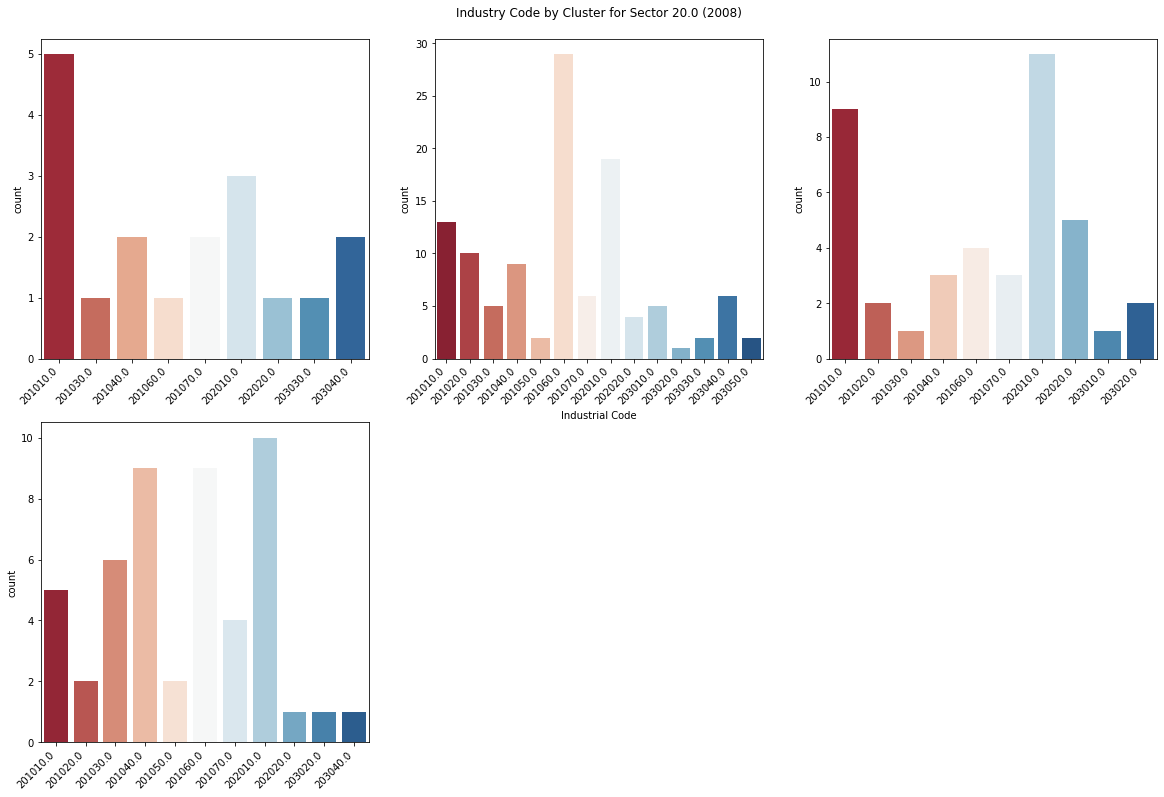

In [15]:
fig = plt.figure(figsize=(20, 20))
for yi in range(4):
    plt.subplot(3, 3, yi + 1)
    if yi == 1:
        title = plt.title("Industry Code by Cluster for Sector 20.0 (2008)")
        title.set_position([.5, 1.05])
        plt.xlabel('Industrial Code')
        plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    sns.countplot(clusters[yi], palette="RdBu")

In [16]:
fig.savefig('./scripts/results/20.0/2008-industries-by-cluster.png', bbox_inches='tight', dpi=250)

In [17]:
cluster_0 = []
for xx in X[y == 0]:
    i = np.where(X == xx)[0][0]
    cluster_0.append(tickers[i])

## Calculating Quantification Measures

## Two Stocks that are Opposite Movement

In [18]:
from tslearn.metrics import dtw

In [19]:
with open('./scripts/results/20.0/20.0-2018-seasonalities.p', 'rb') as f:
    seasonalities = pickle.load(f)

with open('./scripts/results/25.0/25.0-2018-seasonalities.p', 'rb') as f:
    seasonalities_25 = pickle.load(f)

In [20]:
clf_20_2018 = TimeSeriesKMeans().from_pickle('./scripts/results/20.0/20.0-2018-model.p')

In [21]:
clf_25_2018 = TimeSeriesKMeans().from_pickle('./scripts/results/25.0/25.0-2018-model.p')

In [22]:
tickers_20 = list(seasonalities.keys())
tickers_25 = list(seasonalities_25.keys())

In [23]:
dataset = []
for value in seasonalities:
    dataset.append(seasonalities[value]['seasonality_vector'])

In [24]:
dataset_25 = []
for value in seasonalities_25:
    dataset_25.append(seasonalities_25[value]['seasonality_vector'])

In [25]:
X = to_time_series_dataset(dataset)
X = TimeSeriesScalerMeanVariance().fit_transform(X)

X_25 = to_time_series_dataset(dataset)
X_25 = TimeSeriesScalerMeanVariance().fit_transform(X)

In [26]:
y = clf_20_2018.predict(X)
y_25 = clf_25_2018.predict(X_25)

In [27]:
import numpy as np
clusters = {}
for yi in range(4):
    clusters[yi] = []
    for xx in X[y == yi]:
        i = np.where(X == xx)[0][0]
        clusters[yi].append(tickers_20[i])

In [28]:
clusters_25 = {}
for yi in range(4):
    clusters_25[yi] = []
    for xx in X_25[y_25 == yi]:
        i = np.where(X_25 == xx)[0][0]
        try:
            clusters_25[yi].append(tickers_25[i])
        except:
            continue

In [29]:
clusters[2]

['NPK',
 'AJRD',
 'CSL',
 'TT',
 'CSTW',
 'GLUX',
 'BRC',
 'MATX',
 'SNA',
 'NL',
 'KBAL',
 'MKRS',
 'ALPE',
 'CGIPQ',
 'KUBTY',
 'KMT',
 'RGUS',
 'BLDP',
 'ARTW',
 'GTII',
 'PH',
 'CECE',
 'HEI',
 'MALJF',
 'DOV',
 'DIAAF',
 'VOLT',
 'STN',
 'CVA',
 'RADA',
 'CAON',
 'WM',
 'UAL',
 'WTKWY',
 'IESC',
 'OLNCF',
 'MRCY',
 'WPRT',
 'CCTC',
 'DPW',
 'GE',
 'LIME',
 'DOOR',
 'USG',
 'YRCW',
 'SFRX',
 'PLUG',
 'APGI',
 'MXCY',
 'SEII.1',
 'GWR',
 'PNTR',
 'VMI',
 'WGRP',
 'ARWD',
 'PCOA',
 'TAYD',
 'SLCH',
 'CMCO',
 'TRS',
 'MIDD',
 'SPA',
 'TRI',
 'HYGS']

In [30]:
clusters_25[2]

['CSS',
 'M',
 'DRI',
 'PFIN',
 'KENS',
 'GM',
 'SYPR',
 'ESCA',
 'MGA',
 'LAKE',
 'MDC',
 'LIMAF',
 'TWOC',
 'CRMT',
 'ORLY',
 'LCII',
 'TPX',
 'MBPFY',
 'KMX',
 'OXM',
 'DVD',
 'EATR',
 'QEPC',
 'ZPCM',
 'WEYS',
 'BBQ',
 'WACLY',
 'JCPNQ',
 'ROST',
 'CTIB',
 'ABG',
 'BCI.',
 'DXLG',
 'NATH',
 'CTTAY',
 'MECK',
 'CONN',
 'HIBB',
 'WSM']

In [31]:
mdc_closes = get_prices('MDC', year='2018')['prccd']
gwr_closes = get_prices('GWR', year='2018')['prccd']

In [32]:
mdc_closes = mdc_closes.values.reshape(1, -1)
gwr_closes = gwr_closes.values.reshape(1, -1)

mdc = TimeSeriesScalerMeanVariance().fit_transform(mdc_closes)
gwr = TimeSeriesScalerMeanVariance().fit_transform(gwr_closes)

In [33]:
mdc[0].shape

(251, 1)

In [34]:
dtw(mdc[0], gwr[0])

8.482559343681244

In [35]:
def compare_dtw(ticker_1, ticker_2, year='2018', closing=True):

    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values.reshape(1, -1)
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0]
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0]            
    return dtw(t1, t2)

In [36]:
mdc_closes = get_prices('MDC', year='2018')['prccd']

In [37]:
test = (mdc_closes.shift(1) - mdc_closes) / mdc_closes

In [38]:
def calculate_slope(prices):
    shifted = (prices.shift(1) - prices) / prices
    return shifted.dropna()
def compare_slopes_dtw(ticker_1, ticker_2, year='2018'):
    t1 = calculate_slope(get_prices(ticker_1, year=year)['prccd']).values.reshape(1, -1)
    t2 = calculate_slope(get_prices(ticker_2, year=year)['prccd']).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(t1)[0]
    t2 = TimeSeriesScalerMeanVariance().fit_transform(t2)[0]
    
    return dtw(t1, t2)

In [39]:
compare_dtw('MDC', 'GE')

8.098641610088272

In [40]:
compare_slopes_dtw('MDC', 'GE')

11.423977845283618

In [41]:
def compare_dtw_seasonalities(ticker_1, ticker_2, year='2018'):
    if ticker_1 in seasonalities:
        ticker_1 = seasonalities[ticker_1]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_1 = seasonalities_25[ticker_1]['seasonality_vector'].reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = seasonalities[ticker_2]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_2 = seasonalities_25[ticker_2]['seasonality_vector'].reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    
    return dtw(t1, t2)

def calculate_LPCC_dtw(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values
    lpcc_1 = calculate_LPCC(ticker_1_close)
    lpcc_2 = calculate_LPCC(ticker_2_close)
    
    return dtw(lpcc_1, lpcc_2)

In [42]:
def compare_slope_seasonalities_dtw(ticker_1, ticker_2, year='2018'):
    if ticker_1 in seasonalities:
        ticker_1 = calculate_slope(pd.Series(seasonalities[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_1 = calculate_slope(pd.Series(seasonalities_25[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = calculate_slope(pd.Series(seasonalities[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_2 = calculate_slope(pd.Series(seasonalities_25[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)

    return dtw(t1, t2)

In [43]:
def calculate_measure(ticker_1, ticker_2):
    seasonality_compare = compare_dtw_seasonalities(ticker_1, ticker_2)
    print(seasonality_compare)
    series_compare = compare_dtw(ticker_1, ticker_2)
    print(series_compare)
    return 1-np.log((seasonality_compare + series_compare) / 2)

In [44]:
calculate_measure('PH', 'KMT')

5.150774746077982
2.419542131646585


-0.3310877456863148

In [45]:
calculate_measure('PH', 'GE')

9.827591246979317
5.528539644894791


-1.0383676203684122

## Metric Experiments

In [46]:
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import euclidean, minkowski

In [47]:
def calculate_LPCC(series):
    powerspectrum = np.abs(np.fft.fft(series))**2
    cepstrum = np.real(np.fft.ifft(np.log(powerspectrum)))
    n_coefficients = 8
    coefficients = []
    coefficients.append(np.log(n_coefficients))
    coefficients.append(cepstrum[0])
    
    for i in range(2, n_coefficients):
        sum = -cepstrum[i]
        for y in range(1, i):
            sum += float(y) / i * cepstrum[i - y] * coefficients[y]
        coefficients.append(sum)
    return np.asarray(coefficients[1:])

In [48]:
ticker_1_close = get_prices('ORLY', year='2018')['prccd'].values
ticker_2_close = get_prices('GE', year='2018')['prccd'].values

t1_lpcc = calculate_LPCC(ticker_1_close).reshape(1, -1)
t2_lpcc = calculate_LPCC(ticker_2_close).reshape(1, -1)

dtw(t1_lpcc, t2_lpcc)

7.388628901699273

In [49]:
def calculate_pearsonr(ticker_1, ticker_2, year='2018'):
    
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values.reshape(1, -1)
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return pearsonr(t1, t2)[0]

def calculate_pearsonr_slope(ticker_1, ticker_2, year='2018'):
    ticker_1_close = calculate_slope(get_prices(ticker_1, year=year)['prccd']).values.reshape(1, -1)
    ticker_2_close = calculate_slope(get_prices(ticker_2, year=year)['prccd']).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return pearsonr(t1, t2)[0]

def calculate_LPCC_pearson(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values
    lpcc_1 = calculate_LPCC(ticker_1_close)
    lpcc_2 = calculate_LPCC(ticker_2_close)
    return pearsonr(lpcc_1, lpcc_2)[0]

def calculate_pearsonr_slope_seasonality(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = calculate_slope(pd.Series(seasonalities[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_1 = calculate_slope(pd.Series(seasonalities_25[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = calculate_slope(pd.Series(seasonalities[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_2 = calculate_slope(pd.Series(seasonalities_25[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return pearsonr(t1, t2)[0]

def calculate_pearsonr_seasonality(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = seasonalities[ticker_1]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_1 = seasonalities_25[ticker_1]['seasonality_vector'].reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = seasonalities[ticker_2]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_2 = seasonalities_25[ticker_2]['seasonality_vector'].reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return pearsonr(t1, t2)[0]

In [50]:
def calculate_euclidean(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values.reshape(1, -1)
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return euclidean(t1, t2)


def calculate_slope_euclidean(ticker_1, ticker_2, year='2018'):
    ticker_1_close = calculate_slope(get_prices(ticker_1, year=year)['prccd']).values.reshape(1, -1)
    ticker_2_close = calculate_slope(get_prices(ticker_2, year=year)['prccd']).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return euclidean(t1, t2)

def calculate_LPCC_euclidean(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values
    lpcc_1 = calculate_LPCC(ticker_1_close)
    lpcc_2 = calculate_LPCC(ticker_2_close)
    
    return euclidean(lpcc_1, lpcc_2)

def calculate_seasonality_euclidean(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = seasonalities[ticker_1]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_1 = seasonalities_25[ticker_1]['seasonality_vector'].reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = seasonalities[ticker_2]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_2 = seasonalities_25[ticker_2]['seasonality_vector'].reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return euclidean(t1, t2)

def calculate_seasonality_slope_euclidean(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = calculate_slope(pd.Series(seasonalities[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_1 = calculate_slope(pd.Series(seasonalities_25[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = calculate_slope(pd.Series(seasonalities[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_2 = calculate_slope(pd.Series(seasonalities_25[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return euclidean(t1, t2)

In [51]:
def calculate_minkowski(ticker_1, ticker_2, year='2018'):
    
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values.reshape(1, -1)
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return minkowski(t1, t2)


def calculate_slope_minkowski(ticker_1, ticker_2, year='2018'):
    ticker_1_close = calculate_slope(get_prices(ticker_1, year=year)['prccd']).values.reshape(1, -1)
    ticker_2_close = calculate_slope(get_prices(ticker_2, year=year)['prccd']).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return minkowski(t1, t2)

def calculate_LPCC_minkowski(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values
    lpcc_1 = calculate_LPCC(ticker_1_close)
    lpcc_2 = calculate_LPCC(ticker_2_close)
   
    return minkowski(lpcc_1, lpcc_2)

def calculate_seasonality_minkowski(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = seasonalities[ticker_1]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_1 = seasonalities_25[ticker_1]['seasonality_vector'].reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = seasonalities[ticker_2]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_2 = seasonalities_25[ticker_2]['seasonality_vector'].reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return minkowski(t1, t2)

def calculate_seasonality_slope_minkowski(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = calculate_slope(pd.Series(seasonalities[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_1 = calculate_slope(pd.Series(seasonalities_25[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = calculate_slope(pd.Series(seasonalities[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_2 = calculate_slope(pd.Series(seasonalities_25[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return minkowski(t1, t2)

In [52]:
def calculate_spearmanr(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values.reshape(1, -1)
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return spearmanr(t1, t2)[0]

def calculate_spearmanr_slope(ticker_1, ticker_2, year='2018'):
    ticker_1_close = calculate_slope(get_prices(ticker_1, year=year)['prccd']).values.reshape(1, -1)
    ticker_2_close = calculate_slope(get_prices(ticker_2, year=year)['prccd']).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return spearmanr(t1, t2)[0]

def calculate_LPCC_spearmanr(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values
    lpcc_1 = calculate_LPCC(ticker_1_close)
    lpcc_2 = calculate_LPCC(ticker_2_close)

    return spearmanr(lpcc_1, lpcc_2)[0]

def calculate_spearmanr_slope_seasonality(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = calculate_slope(pd.Series(seasonalities[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_1 = calculate_slope(pd.Series(seasonalities_25[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = calculate_slope(pd.Series(seasonalities[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_2 = calculate_slope(pd.Series(seasonalities_25[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return spearmanr(t1, t2)[0]

def calculate_spearmanr_seasonality(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = seasonalities[ticker_1]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_1 = seasonalities_25[ticker_1]['seasonality_vector'].reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = seasonalities[ticker_2]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_2 = seasonalities_25[ticker_2]['seasonality_vector'].reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return spearmanr(t1, t2)[0]

In [53]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

In [54]:
def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [55]:
def calculate_distcorr(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values.reshape(1, -1)
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return distcorr(t1, t2)

def calculate_slope_distcorr(ticker_1, ticker_2, year='2018'):
    ticker_1_close = calculate_slope(get_prices(ticker_1, year=year)['prccd']).values.reshape(1, -1)
    ticker_2_close = calculate_slope(get_prices(ticker_2, year=year)['prccd']).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1_close)[0].reshape(-1,)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2_close)[0].reshape(-1,)
    return distcorr(t1, t2)

def calculate_LPCC_distcorr(ticker_1, ticker_2, year='2018'):
    ticker_1_close = get_prices(ticker_1, year=year)['prccd'].values
    ticker_2_close = get_prices(ticker_2, year=year)['prccd'].values
    lpcc_1 = calculate_LPCC(ticker_1_close)
    lpcc_2 = calculate_LPCC(ticker_2_close)
    return distcorr(lpcc_1, lpcc_2)


def calculate_slope_seasonality_distcorr(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = calculate_slope(pd.Series(seasonalities[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_1 = calculate_slope(pd.Series(seasonalities_25[ticker_1]['seasonality_vector'])).values.reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = calculate_slope(pd.Series(seasonalities[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    else:
        ticker_2 = calculate_slope(pd.Series(seasonalities_25[ticker_2]['seasonality_vector'])).values.reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return distcorr(t1, t2)

def calculate_seasonality_distcorr(ticker_1, ticker_2):
    if ticker_1 in seasonalities:
        ticker_1 = seasonalities[ticker_1]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_1 = seasonalities_25[ticker_1]['seasonality_vector'].reshape(1, -1)
    t1 = TimeSeriesScalerMeanVariance().fit_transform(ticker_1)[0].reshape(-1,)
    
    if ticker_2 in seasonalities:
        ticker_2 = seasonalities[ticker_2]['seasonality_vector'].reshape(1, -1)
    else:
        ticker_2 = seasonalities_25[ticker_2]['seasonality_vector'].reshape(1, -1)
    t2 = TimeSeriesScalerMeanVariance().fit_transform(ticker_2)[0].reshape(-1,)
    return distcorr(t1, t2)

In [56]:
experimental_functions = {
    'euclidean': {
        'prices': [
            calculate_euclidean,
            calculate_slope_euclidean
        ],
        'seasonalities': [
            calculate_seasonality_euclidean,
            calculate_seasonality_slope_euclidean
        ],
        'lpcc': [
            calculate_LPCC_euclidean
        ]
    },
    'pearson': {
        'prices': [
            calculate_pearsonr,
            calculate_pearsonr_slope
        ],
        'seasonalities': [
            calculate_pearsonr_seasonality,
            calculate_pearsonr_slope_seasonality
        ],
        'lpcc': [
            calculate_LPCC_pearson
        ]
    },
    'spearman': {
        'prices': [
            calculate_spearmanr,
            calculate_spearmanr_slope
        ],
        'seasonalities': [
            calculate_spearmanr_seasonality,
            calculate_spearmanr_slope_seasonality
        ],
        'lpcc': [
            calculate_LPCC_spearmanr
        ]
    },
    'distcorr': {
        'prices': [
            calculate_distcorr,
            calculate_slope_distcorr
        ],
        'seasonalities': [
            calculate_seasonality_distcorr,
            calculate_slope_seasonality_distcorr
        ],
        'lpcc': [
            calculate_LPCC_distcorr
        ]
    },
    'minkowski': {
        'prices': [
            calculate_minkowski,
            calculate_slope_minkowski
        ],
        'seasonalities': [
            calculate_seasonality_minkowski,
            calculate_seasonality_slope_minkowski
        ],
        'lpcc': [
            calculate_LPCC_minkowski
        ]
    },
    'dtw': {
        'prices': [
            compare_dtw,
            compare_slopes_dtw
        ],
        'seasonalities': [
            compare_dtw_seasonalities,
            compare_slope_seasonalities_dtw
        ],
        'lpcc': [
            calculate_LPCC_dtw
        ]
    },
}

In [74]:
function_options = ['distcorr', 'euclidean', 'spearman', 'dtw', 'pearson']
types = ['prices', 'prices_slope', 'seasonalities', 'seasonalities_slope', 'lpcc']
pairs = [['PH', 'KMT'], ['GE', 'ORLY'], ['WM', 'DOV'], ['ABG', 'VMI']]

In [75]:
from tqdm.notebook import tqdm

In [76]:
results = {}
for function in tqdm(function_options):
    results[function] = {}
    for i, function_type in enumerate(types):
        results[function][function_type] = {}
        for pair in pairs:
            if function_type == 'lpcc' and function in ['spearman', 'distcorr', 'pearson']:
                break
            if function_type == 'lpcc':
                func = experimental_functions[function][function_type][0]
            else:
                func = experimental_functions[function][function_type.split('_')[0]][i % 2]
            results[function][function_type]['_'.join(pair)] = func(pair[0], pair[1])

In [77]:
df = pd.DataFrame.from_dict(results, orient="index").stack().to_frame()

In [78]:
df = pd.DataFrame(df[0].values.tolist(), index=df.index)

In [79]:
df.dropna()

PH_KMT    GE_ORLY     WM_DOV    ABG_VMI
distcorr  prices                0.933094   0.760152   0.376559   0.429073
          prices_slope          0.739026   0.173619   0.506311   0.448955
          seasonalities         0.934908   0.538371   0.729828   0.326961
          seasonalities_slope   0.198828   0.356341   0.110260   0.170453
euclidean prices                4.453253  29.290750  22.207420  16.717403
          prices_slope         10.721045  20.562178  17.225745  16.968116
          seasonalities         8.176306  22.910061  17.016100  32.442651
          seasonalities_slope  34.832749  38.700041  35.150171  34.465562
          lpcc                  6.457348   7.388629   6.713740   6.398275
spearman  prices                0.920616  -0.772316   0.092279   0.378422
          prices_slope          0.748626   0.090257   0.512764   0.458320
          seasonalities         0.936434   0.567282   0.770498   0.160470
          seasonalities_slope   0.610522   0.098781  -0.024676   0.030110
dtw       prices                2.419542  25.873740  13.344298  10.226646
          prices_slope          9.068721  11.663766  13.343270  11.875619
          seasonalities         5.150775   7.632088   6.087698  12.200168
          seasonalities_slope  29.085745  23.353417  17.077565  15.772150
          lpcc                  5.414363   6.462072   5.753545   5.402356
pearson   prices                0.960495  -0.709060   0.017591   0.443284
          prices_slope          0.770118   0.154394   0.406547   0.424166
          seasonalities         0.945737   0.573968   0.764978   0.145677
          seasonalities_slope   0.013561  -0.217637  -0.004500   0.034248